# **(Data Analysis)**

## Objectives

* Evaluate The Data
* Shape Data
* Correlate Data
* Remove uneeded categories
* Split into Test and Train Sets

## Inputs

* outputs/datasets/collection/data.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned

## Additional Comments

* Data Cleaning Pipeline
Drop Variables: ['id', 'diagnosis' ]


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Breast-Cancer-Prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Breast-Cancer-Prediction'

# Section 1 Analysing the Data

In [12]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing our cancer dataset
dataset = pd.read_csv('inputs/datasets/raw/data.csv')
X = dataset.iloc[:, 1:31].values
Y = dataset.iloc[:, 31].values

examine the data using the pandas head() method

In [19]:
dataset.head()
df = pd.read_csv(f"inputs/datasets/raw/data.csv")

Next, we can find the dimensions of the data set we are using by using panda dataset ‘shape’ attribute

In [15]:
print("Cancer data set dimensions : {}".format(dataset.shape))


Cancer data set dimensions : (569, 32)


The data set has 569 rows and 32 columns. ‘Diagnosis’ is the column that we will use to predict if the cancer is malignant or benign.M = malignant or B = benign. 1 means the cancer is malignant and 0 means benign. 569 people, 357 are labeled “B” (benign) and 212 as “M” (malignant).

# Observation: We can relatively say that the dataset is balanced.

---

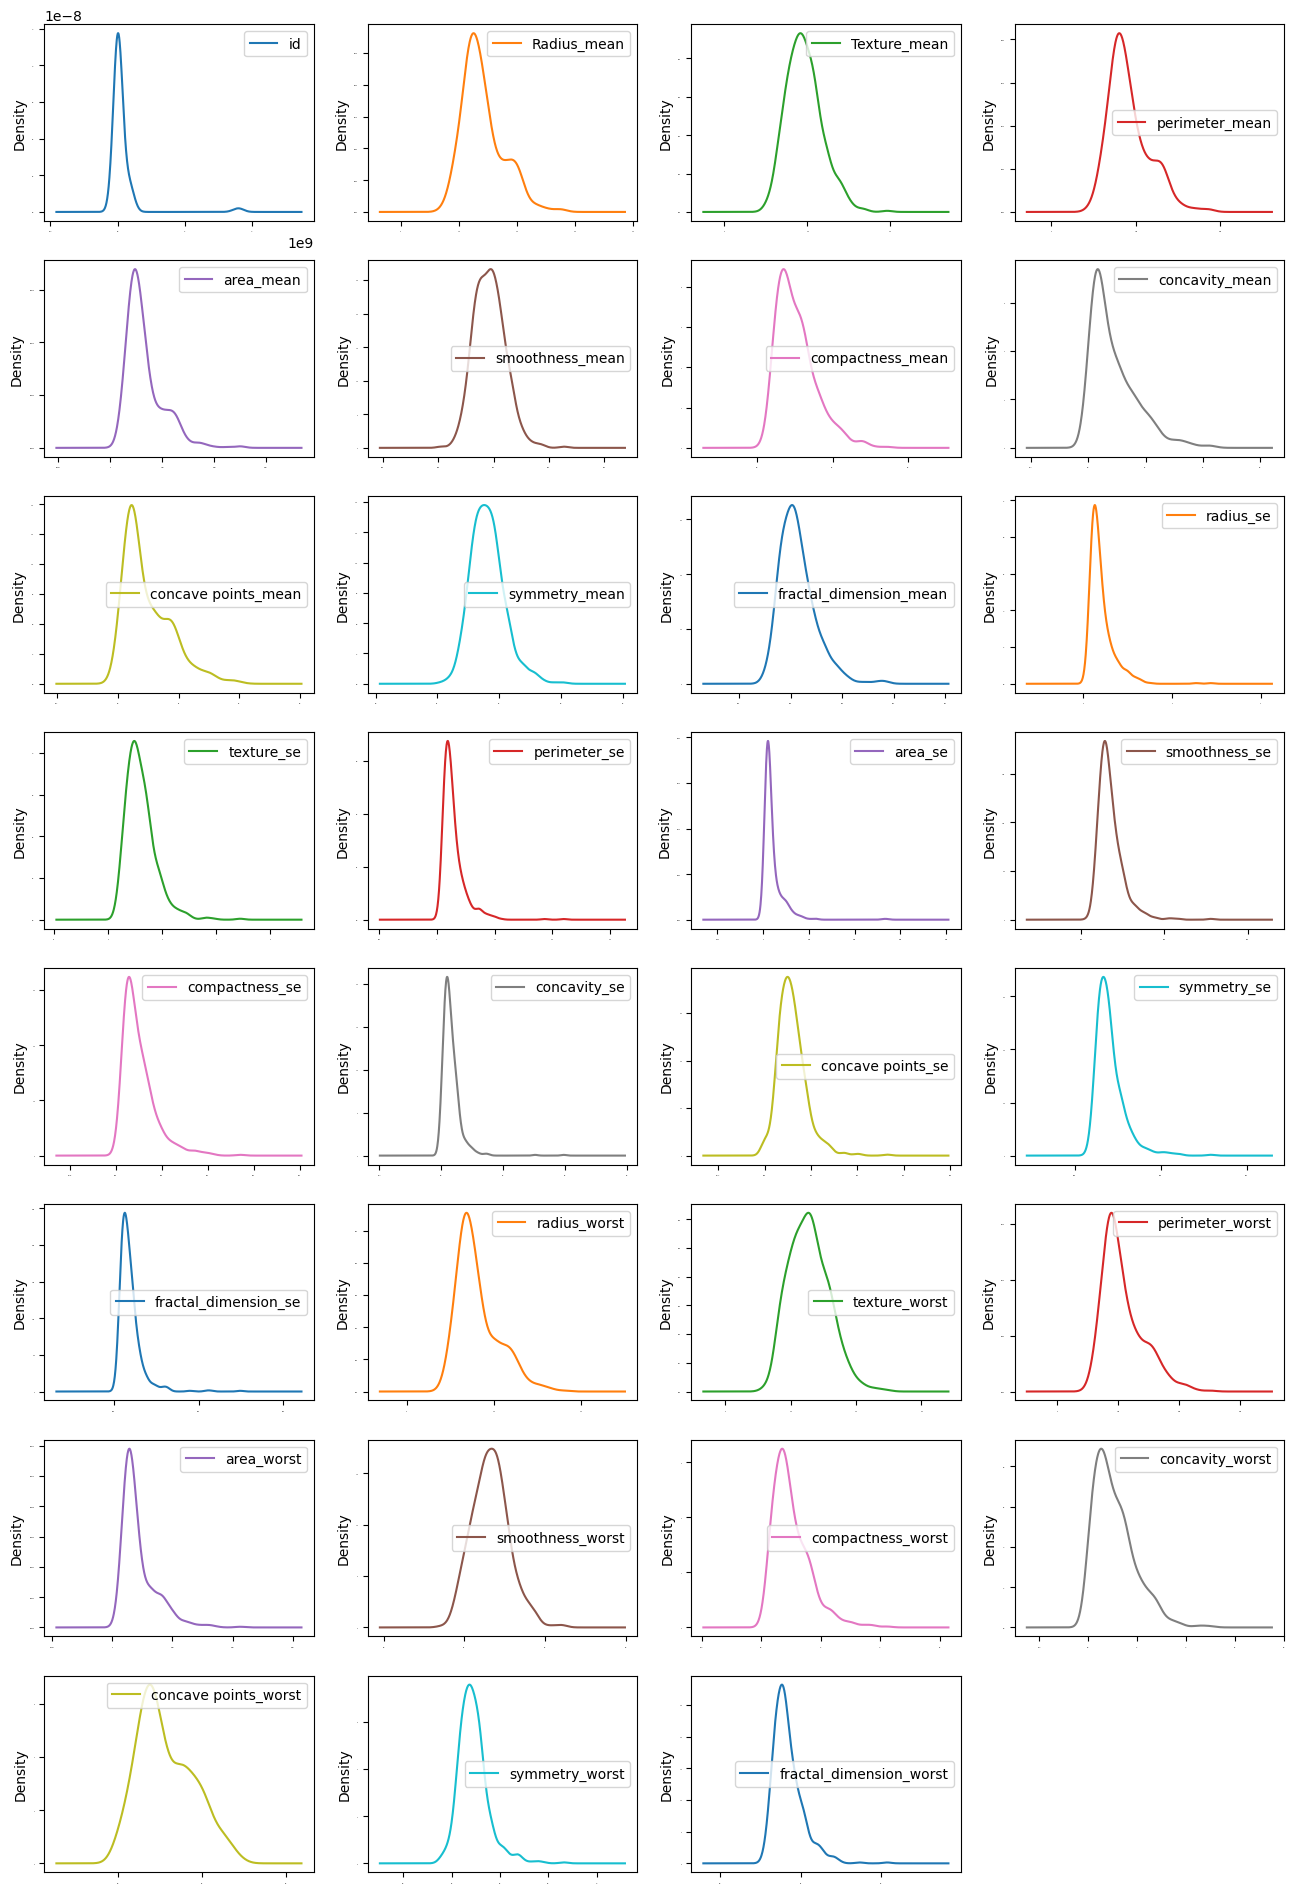

In [20]:
# Let's check the distribution of the numerical feature
df.drop('diagnosis', axis=1).plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True, 
                                            fontsize=1, figsize=(16,24))
plt.show()
plt.savefig("")

# Observation: We are going to ignore id column. As you can see on the above chart, even though some features left skewed, all of them follows the normal distribution.

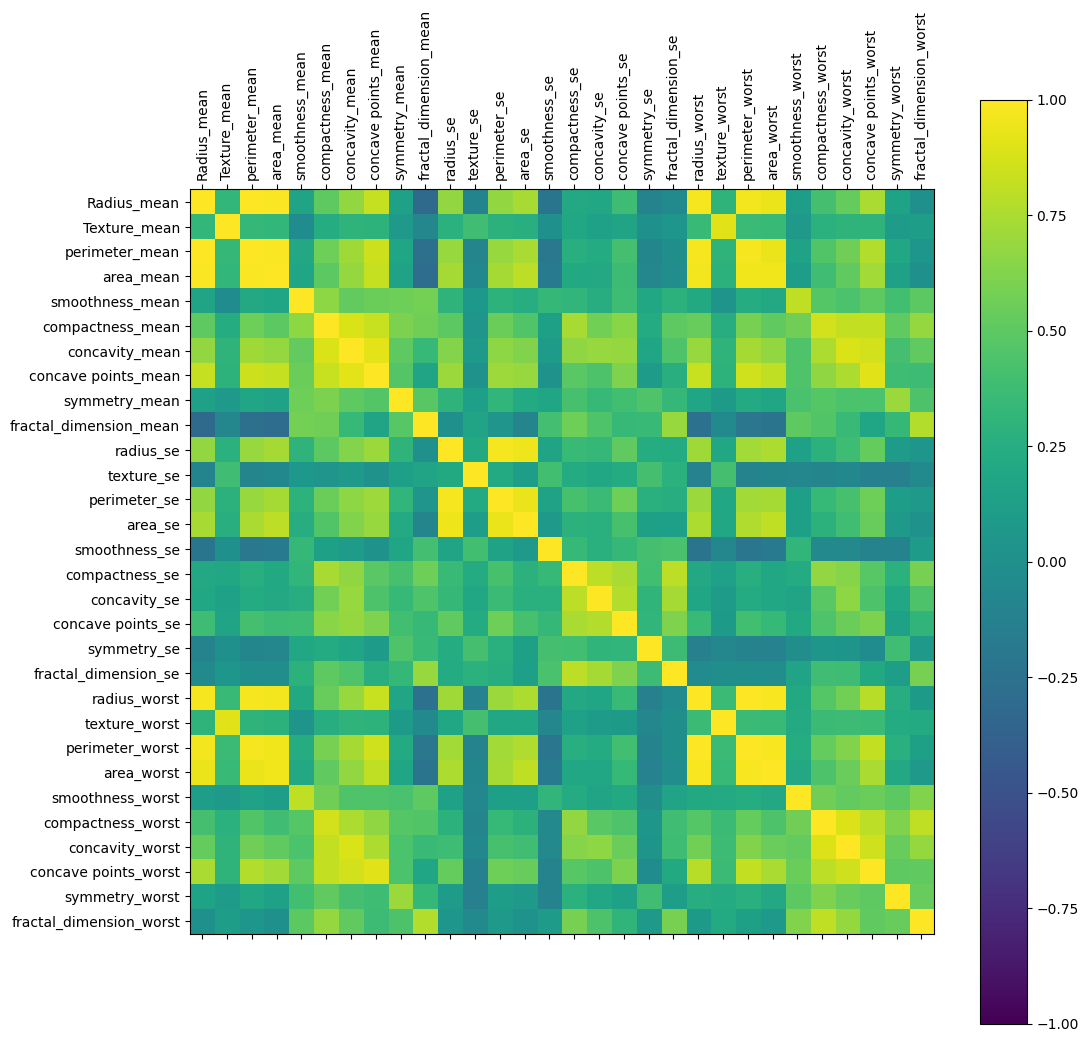

In [21]:
# Correlation
df_corr = df.drop(['id', 'diagnosis'], axis=1)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df_corr.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)
ticks = np.arange(0, len(df_corr.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90)
ax.set_yticklabels(df_corr.columns)
plt.show()

# Observation: There are a lot of features that have strong correlation to each other. We might need to a type of feature selection method. First we need to check the baseline then we should decide if we need or not.

---

# Section 2 Split Data into Train Test and Validation Sets

In [35]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['id'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (455, 32) 
TestSet shape: (114, 32)


In [36]:
variables_method = ['id', 'diagnosis' ]

print(f"* {len(variables_method)} variables to drop \n\n"
    f"{variables_method}")

* 2 variables to drop 

['id', 'diagnosis']


NOTE

In [37]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)

In [38]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)

TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)
